# 🧩 Comparing Distributions – KS Test for Normality

In [1]:
# ✅ Setup and Imports
import pandas as pd
import numpy as np
from pathlib import Path
import sys
from scipy.stats import norm

# Setup path for project-wide imports
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Imports
from utils.model_utils import run_kstest_normality, generate_normal_and_skewed_data
from utils.visual_utils import save_and_show_plot

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest

In [2]:
# 📂 Export Paths
EXPORT_PLOTS = Path("../exports/plots/common_kstest_comparison")
EXPORT_TABLES = Path("../exports/tables/common_kstest_comparison")
EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

## 📊 Step 1: Generate Distributions

In [3]:
# Generate Distributions
df = generate_normal_and_skewed_data(n=200)
df.head()

,normal,skewed
0,0.563650,1.073042
1,-1.259004,1.433776
2,-0.076318,1.648716
3,0.257086,1.338733
4,-1.225589,3.389787


## 📈 Step 2: Visualize Histograms

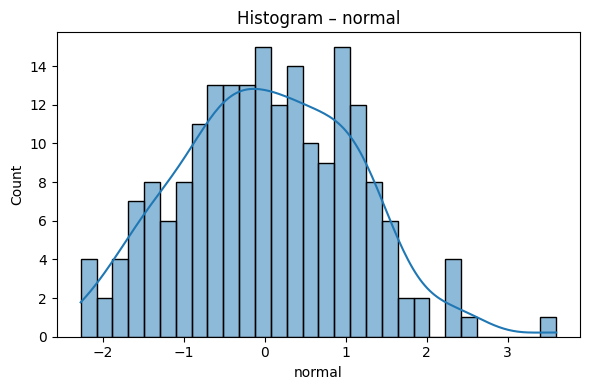

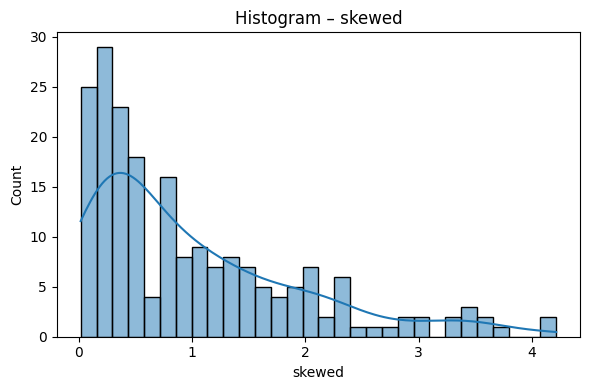

In [4]:
# Visualize Histograms
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram – {col}")
    save_and_show_plot(f"histogram_{col}", EXPORT_PLOTS)

## 🧪 Step 3: Kolmogorov–Smirnov Test for Normality

In [5]:
# Kolmogorov–Smirnov Test for Normality
results = {}
for col in df.columns:
    stat, pval = run_kstest_normality(df[col])
    results[col] = {"KS Statistic": stat, "p-value": pval}

In [6]:
# Display results
ks_df = pd.DataFrame(results).T
display(ks_df)

,KS Statistic,p-value
normal,0.034695,0.962784
skewed,0.153067,0.000148


In [7]:
# Export results
ks_df.to_csv(EXPORT_TABLES / "ks_test_results.csv")

## 📈 CDF Plots to visualize the difference

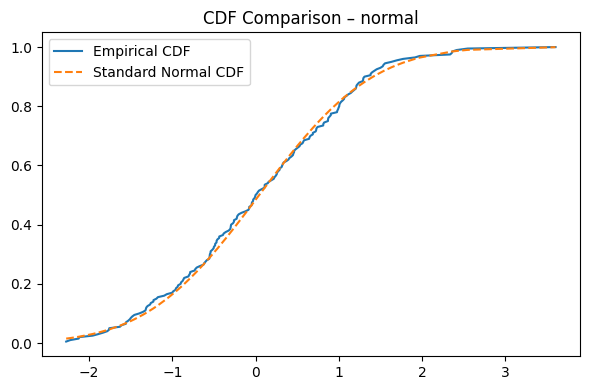

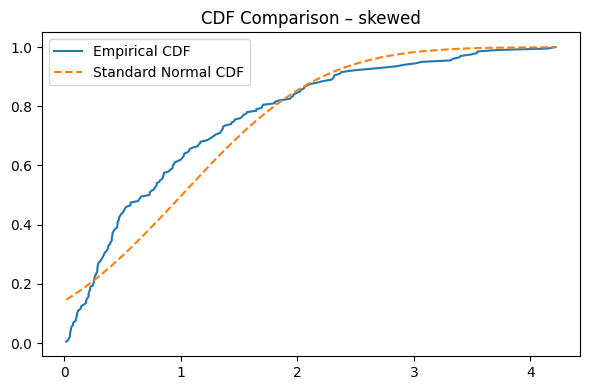

In [8]:
# 📈 CDF Plots to visualize the difference
for col in df.columns:
    sorted_data = np.sort(df[col])
    ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.figure(figsize=(6, 4))
    plt.plot(sorted_data, ecdf, label="Empirical CDF")
    plt.plot(sorted_data, norm.cdf((sorted_data - sorted_data.mean()) / sorted_data.std()), 
             label="Standard Normal CDF", linestyle="--")
    plt.title(f"CDF Comparison – {col}")
    plt.legend()
    save_and_show_plot(f"cdf_comparison_{col}", EXPORT_PLOTS)

## ✅ Summary:
- Generated synthetic datasets: one normal, one skewed
- Applied KS test to check for normality against standard normal distribution
- Exported test statistics and p-values
- Visualized histograms and CDF overlays for interpretation